<H1 style="color:SlateBlue;"> Grip: The Spark Foundation </H1>

<b> Data Science and Business Analytics Internship </b>

<b> Task One: Prediction Using Supervised Machine Learning</b>

<b> Submitted by ABHISHEK A L </b>

<H3 style="color:SlateBlue;"> Relationship Between Student Study Hours and Marks:</H3> 

<p><b> Here we are trying to find underlying relationship between student study hours and scores using simple linear regression. 
    Let us start by loding required python libraries for our work first.</b> </p>

<H5 style="color:Crimson;"> Required Python Libraries </H5>

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn import metrics 
from sklearn.metrics import r2_score

<h5 style="color:Crimson;"> Now Let us Read and Explore the Dataset </h5>

In [10]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


<h5 style="color:Crimson;"> Let us first have a descriptive exploration on our data. </h5>

In [11]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


<li><b>So we don't have any missing values. </b></li>

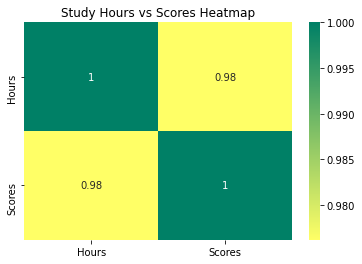

In [32]:
data.corr()
sns.heatmap(data.corr(),annot=True, cmap='summer_r')
plt.title("Study Hours vs Scores Heatmap")
plt.show()

<p> So Hours and Scores has correlation of 0.976 </p>

<h5 style="color:Crimson;"> Histogram of Study hours and scores </h5> 

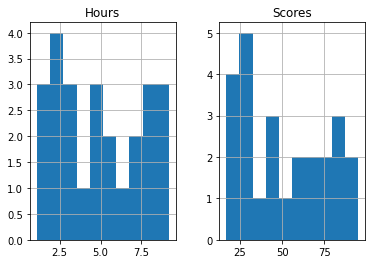

In [14]:
data.hist()
plt.show()

<H5 style="color:Crimson;"> Scatter plot of student study hours and scores </H5>

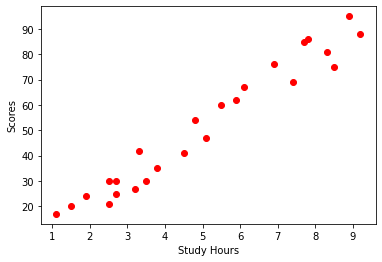

In [15]:
plt.scatter(data.Hours, data.Scores, color= 'Red')
plt.xlabel('Study Hours')
plt.ylabel('Scores')
plt.show()

<li><b>We can observe that when Study hours increases Scores also increses.</b></li>

<h2 style="color:DarkViolet;"> Modeling data </h2>

<p> Now we are going to build a machine learning model to explore underlying relationship between Student study hours and their marks. To do that we will first split our dataset into two sets, 75% data for training our model and rest of 25% data for testing our created model. </p>

<h5 style="color:Crimson;"> Splitting dataset into train and test </h5> 

In [16]:
x= data.iloc[:,:-1].values
y= data.iloc[:,1].values

from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)


<h5 style="color:Crimson;"> Train data distribuion </h5>

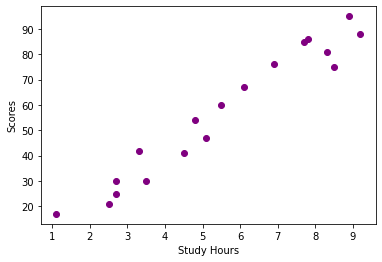

In [17]:
plt.scatter(x_train, y_train, color= 'Purple')
plt.xlabel('Study Hours')
plt.ylabel('Scores')
plt.show()

<h5 style="color:Crimson;"> Finding the regression coefficients </h5>

In [18]:
regr = linear_model.LinearRegression()
regr.fit (x_train, y_train)
print ('Coefficient: ', regr.coef_)
print ('Intercept: ',regr.intercept_)
predicted_y = regr.predict(x_test)

Coefficient:  [9.94167834]
Intercept:  1.932204253151646


<h5 style="color:Crimson;"> Fitting the regression line </h5>

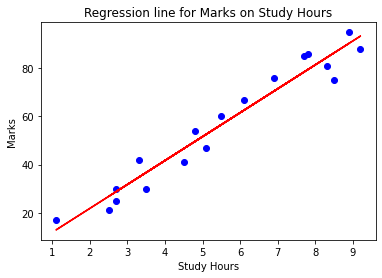

In [26]:
plt.scatter(x_train, y_train,  color='blue')
plt.plot(x_train, regr.coef_[0]*x_train + regr.intercept_, '-r')
plt.xlabel("Study Hours")
plt.ylabel("Marks")
plt.title("Regression line for Marks on Study Hours")
plt.show()

<h5 style="color:Crimson;">Comparing Test set with predicted values </h5>

In [22]:
df = pd.DataFrame({'Actual Score':y_test, 'Predicted Score': predicted_y})
print(df) 

   Actual Score  Predicted Score
0            20        16.844722
1            27        33.745575
2            69        75.500624
3            30        26.786400
4            62        60.588106
5            35        39.710582
6            24        20.821393


<h5 style="color:Crimson;">Plotting Actual score with Predicted score</h5>

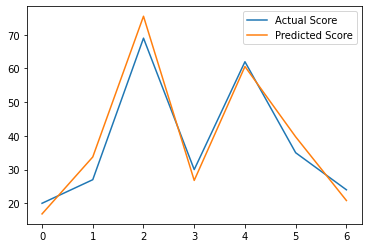

In [25]:
df.plot(kind='line')
plt.show()

<h5 style="color:Crimson;">Predicting marks for any study hour value we want. </h5>

<p> Let us find how a student performs if he/she studies 9.25 hours a day, </p>

In [23]:
Score5Hours = regr.predict([[9.25]])
print('Study_time: 9.25 hours, Score: %.2f' %Score5Hours[0],"%") 

Study_time: 9.25 hours, Score: 93.89 %


<h3 style="color:DarkViolet;"> Model Evaluation </h3>

<p> Here we will use various evaluation methods to evaluate our machine learning model such as Mean Square Error, Root Mean squared error and R-square value. </p>

In [33]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(predicted_y - y_test)))
print("Mean residual sum of squares (MSE): %.2f" % np.mean((predicted_y - y_test) ** 2))
print("R2-score: %.2f" % r2_score(y_test, predicted_y))

Mean absolute error: 4.13
Mean residual sum of squares (MSE): 20.33
R2-score: 0.94


<p> Small number for both MAE and MSE indicates a good fit and R2-score closer to 1 also indicates the same. So we can say our linear model is a good fit here. </p>